In [1]:
import os
import numpy as np
import pandas as pd
import jax
import jax.numpy as jnp
import optax
import datasets
import models
import samplers
import matplotlib.pyplot as plt
from conv_emergence import compute_entropy as entropy
from experiments import make_key, simulate
from viz_box import position_mean_var, ipr, entropy_sort, mean_sort, var_sort, plot_receptive_fields

In [2]:
config = dict(
    seed=0,
    num_dimensions=40,
    num_hiddens=10,
    gain=10.,
    init_scale=1e-2,
    activation='shifted_relu',
    model_cls=models.MLP,
    optimizer_fn=optax.sgd,
    learning_rate=1e-3,
    batch_size=1,
    num_epochs=8000,
    dataset_cls=datasets.NonlinearGPDataset,
    xi1=3.0,#(0.45, 0.5),
    xi2=0.1,#(0.05, 0.1), 
    class_proportion=0.5,
    sampler_cls=samplers.EpochSampler,
    init_fn=models.xavier_normal_init
)
evaluation_interval = 500

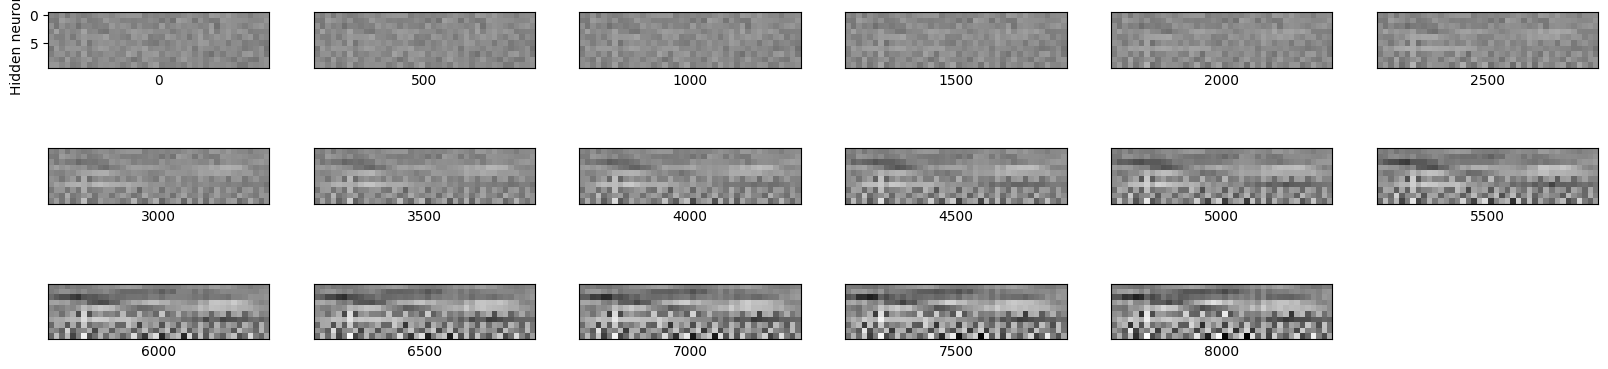

In [6]:
config['gain'] = 0.1
path_key = make_key(**config)
weights = np.load(f"results/cluster/jax_results/fc1_{path_key}.npy")
metrics = pd.read_csv(f"results/cluster/jax_results/metrics_{path_key}.csv")
fig, axs = plot_receptive_fields(weights, num_cols=6, figsize=(20, 5), reordering_fn=entropy_sort, ind=-1, center_sort=True, evaluation_interval=evaluation_interval)

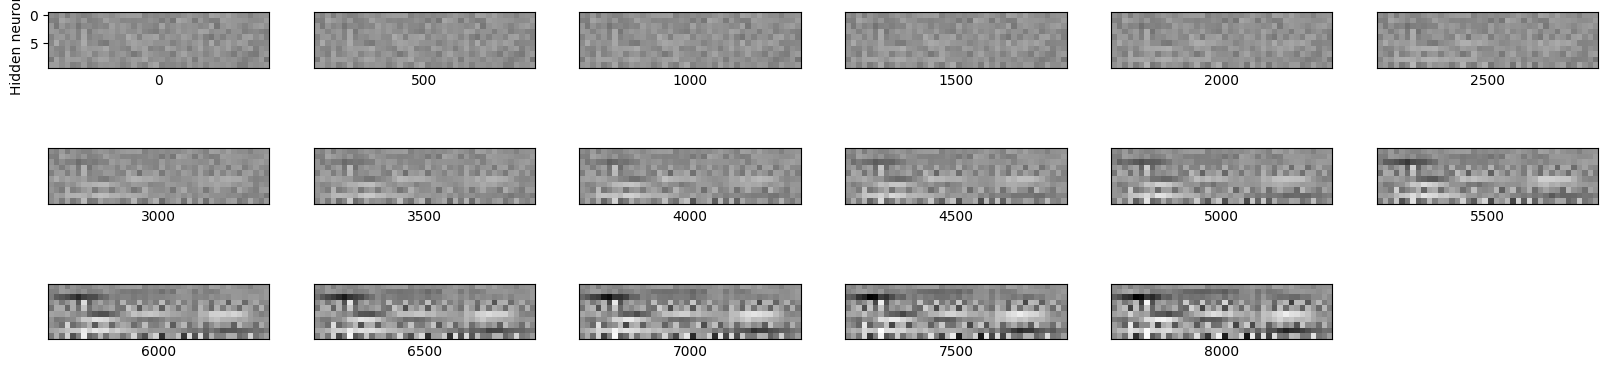

In [4]:
config['gain'] = 1.0
path_key = make_key(**config)
weights = np.load(f"results/cluster/jax_results/fc1_{path_key}.npy")
fig, axs = plot_receptive_fields(weights, num_cols=6, figsize=(20, 5), reordering_fn=entropy_sort, ind=-1, center_sort=True, evaluation_interval=evaluation_interval)

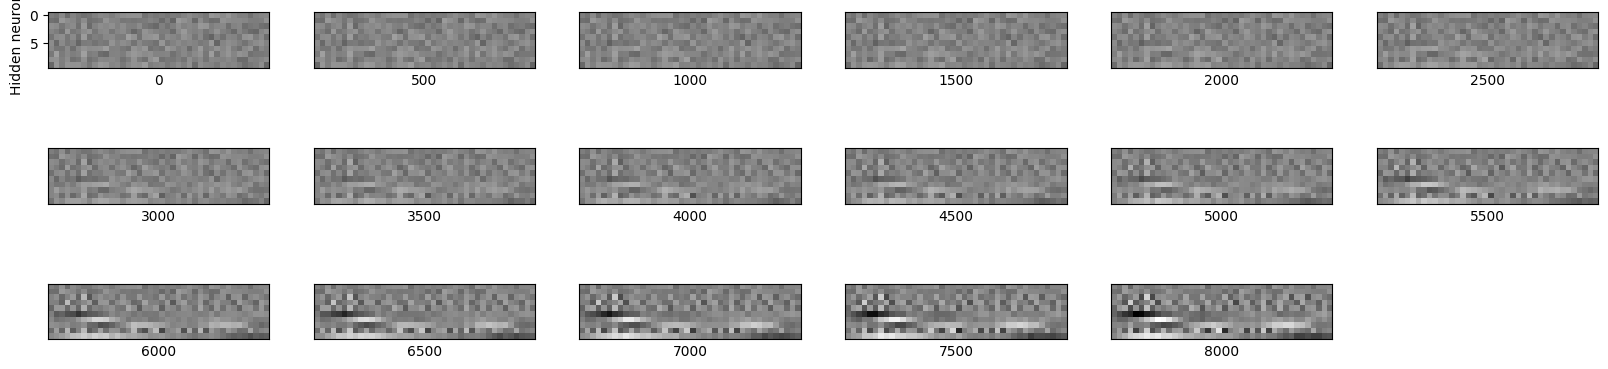

In [5]:
config['gain'] = 10.
path_key = make_key(**config)
weights = np.load(f"results/cluster/jax_results/fc1_{path_key}.npy")
fig, axs = plot_receptive_fields(weights, num_cols=6, figsize=(20, 5), reordering_fn=entropy_sort, ind=-1, center_sort=True, evaluation_interval=evaluation_interval)

In [3]:
config['gain'] = 0.1
config['num_hiddens'] = 10
config['save_'] = False

weights_, metrics_ = simulate(**config)

Using JAX backend: cpu

Using configuration:
{'activation': 'shifted_relu',
 'batch_size': 1,
 'class_proportion': 0.5,
 'dataset_cls': <class 'datasets.nonlinear_gp.NonlinearGPDataset'>,
 'gain': 0.1,
 'init_fn': <function xavier_normal_init at 0x1556a98a0>,
 'init_scale': 0.01,
 'learning_rate': 0.001,
 'model_cls': <class 'models.feedforward.MLP'>,
 'num_dimensions': 40,
 'num_epochs': 8000,
 'num_hiddens': 10,
 'optimizer_fn': <function sgd at 0x1555ef100>,
 'sampler_cls': <class 'samplers.base.EpochSampler'>,
 'save_': False,
 'seed': 0,
 'wandb_': False,
 'xi1': 3.0,
 'xi2': 0.1}

Length of train dataset: 8000
Length of eval dataset: 1000
Length of train sampler: 8000
Length of eval sampler: 1000
Model:
MLP(
  fc1=Linear(
    weight=f32[10,40],
    bias=None,
    in_features=40,
    out_features=10,
    use_bias=False
  ),
  act=<function <lambda>>,
  fc2=Linear(
    weight=f32[1,10],
    bias=None,
    in_features=10,
    out_features=1,
    use_bias=False
  ),
  tanh=<wrapped f

KeyboardInterrupt: 

In [24]:
key = jax.random.PRNGKey(0)
dataset = datasets.NonlinearGPDataset(key=key, xi1=11.1, xi2=0.1, gain=0.01, num_dimensions=100)
x, y = dataset[:100]

-1.0


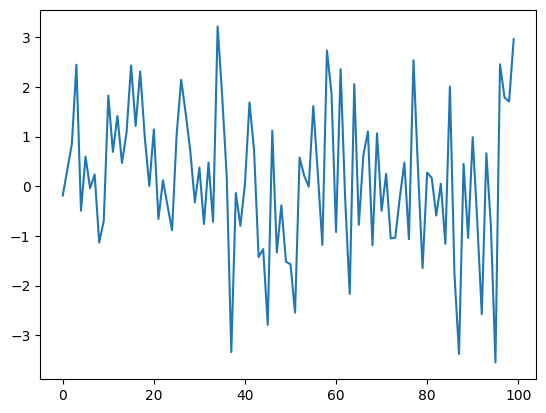

In [26]:
i = 0
print(y[i])
_ = plt.plot(x[i])